# 第十讲：方向导数和梯度
___

## 1. 方向导数 （directional derivative）

我们以二维平面为例，函数$f(x, y):\mathbb{R}^2 \mapsto \mathbb{R}$，则函数在点$(x_0, y_0)$沿方向$\mathbf{\ell}$的导数为：
$$
\frac{\partial f}{\partial \ell} \Bigg \vert_{(x_0, y_0)} = \partial f \cdot \frac{\mathbf{\ell}}{\lvert \mathbf{\ell} \rvert}
$$

若$\ell$的方向余弦为$(\cos \alpha, \cos \beta)$，其中$\alpha$为方向与$x$轴的夹角，$\beta$为方向与$y$轴的夹角，并且有
$$
\alpha + \beta = \pi/2
$$

则方向导数可记为：
$$
\frac{\partial f}{\partial \ell} \Bigg \vert_{(x_0, y_0)} = \frac{\partial f}{\partial x} \cos \alpha + \frac{\partial f}{\partial y} \cos \beta = \operatorname{grad} f \left( \begin{array}{c}
\cos \alpha\\
\cos \beta
\end{array}
\right)
$$

## 2. 梯度（gradient）

$$
\frac{\partial f}{\partial \mathbf{\ell}} \Bigg \vert_{(x_0, y_0)} = \mathbf{g}^T \mathbf{\ell}_0 = \lvert \mathbf{g} \rvert \cos \langle \mathbf{g}, \mathbf{\ell}_0 \rangle
$$

其中$\langle \mathbf{g}, \mathbf{\ell}_0 \rangle$表示$\mathbf{g}$与$\mathbf{\ell}_0$之间的夹角。这样很明显：

- 当$\mathbf{g}$与$\mathbf{\ell}_0$方向相同时，两者夹角的余弦最大，也就是说沿梯度方向方向导数最大，函数值上升最快；

- 当$\mathbf{g}$与$\mathbf{\ell}_0$方向相反，两者夹角为$\pi$，也就是说沿负梯度方向方向导数最小，函数值下降最快。

梯度记为$\partial f$或$\nabla f$。

## 3. 梯度场（gradient field）和等高线

我们可以用图形表示梯度场，也就是函数在不同点的梯度值和方向的变化。

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [47]:
x = np.linspace(-5., 5., 41)
y = np.linspace(-5., 5., 41)
x2 = np.linspace(-5.,5.,11)
y2 = np.linspace(-5.,5.,11)
xv, yv = np.meshgrid(x, y, indexing='ij', sparse=False)
x2v, y2v = np.meshgrid(x2, y2, indexing='ij', sparse=False)
#hv = h0/(1 + (xv**2+yv**2)/(R**2))
#h2v = h0/(1 + (x2v**2 + y2v**2)/(R**2)) # Surface on coarse grid
#hv = -xv**4 + 4*(xv**2 - yv**2) - 3
#h2v = -x2v**4 + 4*(x2v**2 - y2v**2) - 3
hv = xv*yv
h2v = x2v*y2v

In [48]:
dhdx, dhdy = np.gradient(h2v) 

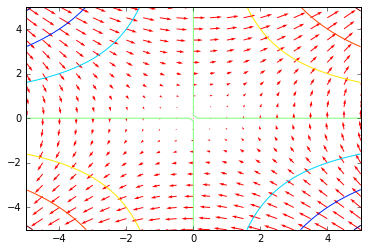

In [41]:
fig = plt.figure(11)
ax = fig.gca()
ax.quiver(x2v, y2v, dhdx, dhdy, color='r',
    angles='xy', scale_units='xy')
ax.contour(xv, yv, hv)
#plt.axis('equal')

上图中，每个小箭头是函数在该点的梯度值，梯度值越大，表示函数在这个位置越是陡峭；相反则越是平缓。箭头指向的方向是函数值上升的方向，从等高线和箭头的方向也依稀可以看出，函数的局部极大值出线在中心原点位置？

## 4. 函数的3d图

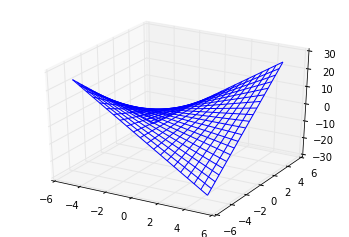

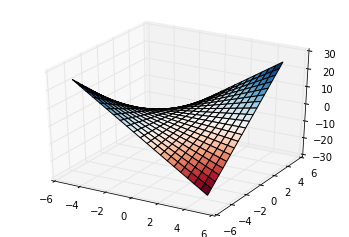

In [49]:
fig = plt.figure(120)
ax = fig.gca(projection='3d')
ax.plot_wireframe(xv, yv, hv, rstride=2, cstride=2)
# Simple plot of mountain and parametric curve
fig = plt.figure(121)
ax = fig.gca(projection='3d')
from matplotlib import cm
ax.plot_surface(xv, yv, hv, cmap=cm.RdBu, rstride=2, cstride=2)